## Do general imports

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from preprocessing.ProjectsPreProcess import ProjectsPreProcess

pd.set_option('display.max_columns', None)


## Load Datasets

In [3]:
ppp = ProjectsPreProcess()
issues_df = pd.read_csv('./temp_data/issues_preprocessed.csv')

projects_df = ppp.pre_process(issues_df, clusters=4, features=[ 'issue_comments_count_mean',
                                      'issue_contr_count_mean', 'processing_steps_mean'])
    
print(F'Total records in dataset %i' % len(projects_df))

projects_df.head(10)

Total records in dataset 232


,issue_proj,count,wf_total_time_mean,issue_comments_count_mean,issue_contr_count_mean,processing_steps_mean,category
0,AE00AGT,39,2367124.0,15.0,2.0,6.0,2
1,AE00BNP,38,1489210.0,11.0,3.0,5.0,2
2,AE00CITI,8,2138976.0,9.0,2.0,4.0,2
3,AE00SIB,53,2375061.0,10.0,2.0,4.0,2
4,AE10EDW,31,2483943.0,12.0,2.0,5.0,2
5,AE15HSBC,23,1826532.0,8.0,2.0,4.0,2
6,AE15SIB,10,2823307.0,12.0,2.0,3.0,2
7,BH00AHU,16,2843311.0,13.0,2.0,5.0,2
8,BH00ARAB,14,2802189.0,17.0,2.0,5.0,2
9,BH00BBK,3,7200503.0,22.0,2.0,5.0,2


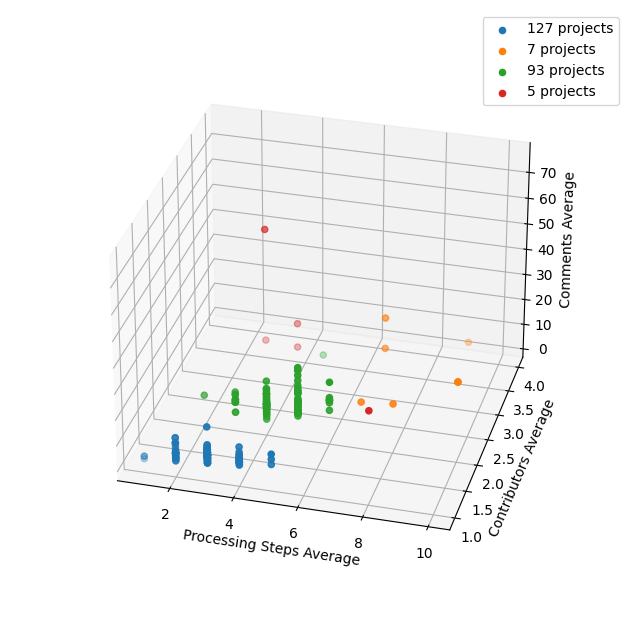

In [4]:
# colors = ['red','orange','green','blue','gray']
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')

# categories = issues_df[['proj_category','wf_total_time']].groupby('proj_category').count().sort_values('wf_total_time').index
categories = projects_df['category'].drop_duplicates().sort_values()

# y = ('Total Time Average','wf_total_time_mean',)
# z = ('Project category', 'category',categories)
y = ('Contributors Average','issue_contr_count_mean',)
z = ('Comments Average','issue_comments_count_mean')
# z = ('Issues Count','count',)
x = ('Processing Steps Average', 'processing_steps_mean',)

for i,c in enumerate(categories):
    # Plot the 3D surface
    df = projects_df[projects_df['category'] == c]
    projects = df['wf_total_time_mean'].drop_duplicates()
    ax.scatter(df[x[1]],df[y[1]],df[z[1]],label=f'{len(projects)} projects')

ax.legend()
if len(z) > 2:
    ax.set_zticks(z[2])
if len(x) > 2:
    ax.set_xticks(x[2])
if len(y) > 2:
    ax.set_yticks(y[2])
        
# Plot the 3D surface
ax.set_xlabel(x[0])
ax.set_ylabel(y[0])
ax.set_zlabel(z[0])

# ax.view_init(elev=60, azim=50, roll=0)
ax.view_init(elev=30, azim=-75)
ax.set_box_aspect(aspect=None, zoom=0.85)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-pack

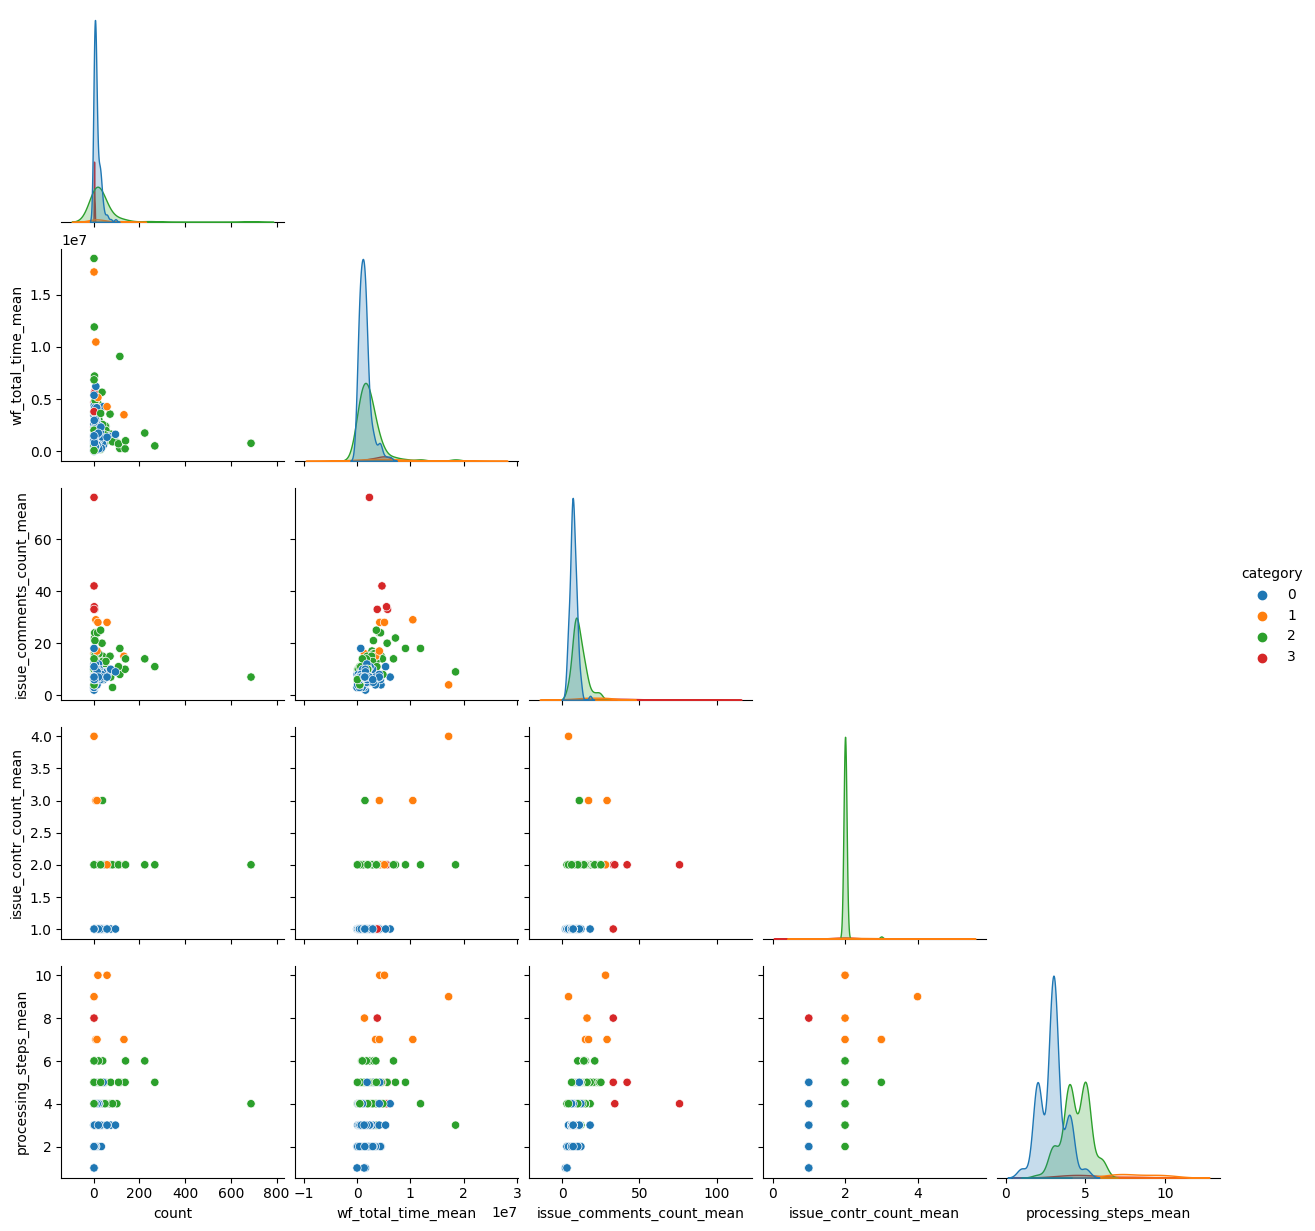

In [5]:
sns.pairplot(projects_df[projects_df.columns[1:]],hue='category',corner=True,palette=sns.color_palette("tab10"))#,kind="kde")